In [1]:
!pip install intake intake-esm xarray zarr gcsfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.9/203.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.0 MB/s eta 0:00:00


In [2]:
import intake
import xarray as xr

# Load the Pangeo CMIP6 cloud data catalog
col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_catalog(col_url)

# See what experiments/models are available
print(list(col))

[]


In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [4]:
import intake

col_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(col_url)

col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [19]:
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [24]:
import numpy as np
np.sum(col.df['activity_id']=='ScenarioMIP')

np.int64(148581)

In [25]:
df_ = col.df[col.df['activity_id']=='ScenarioMIP']

In [33]:
df_[df_['table_id']=='6hrLev']['source_id'].unique()

array(['IPSL-CM6A-LR', 'CNRM-CM6-1', 'BCC-CSM2-MR', 'CanESM5',
       'MRI-ESM2-0', 'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'NESM3',
       'CNRM-ESM2-1', 'ACCESS-CM2', 'NorESM2-LM', 'MIROC6', 'FGOALS-g3',
       'CESM2', 'UKESM1-0-LL'], dtype=object)

In [32]:
df_6hr = df_[df_['table_id']=='6hrLev']
df_6hr

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
49834,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,hus,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
49835,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,ps,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
49836,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,ua,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
49837,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,va,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
54101,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp585,r1i1p1f2,6hrLev,va,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20190219
...,...,...,...,...,...,...,...,...,...,...,...
441708,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602
441709,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602
441710,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602
441712,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602


In [35]:
df_6hr[df_6hr['source_id'] == 'IPSL-CM6A-LR']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
49834,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,hus,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
49835,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,ps,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
49836,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,ua,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
49837,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,va,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190119
275354,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,6hrLev,ta,gr,gs://cmip6/CMIP6/ScenarioMIP/IPSL/IPSL-CM6A-LR...,NaN,20190903


In [36]:
df_6hr[df_6hr['source_id'] == 'CNRM-CM6-1']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
54101,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp585,r1i1p1f2,6hrLev,va,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20190219
54161,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp585,r1i1p1f2,6hrLev,hus,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20190219
54175,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp585,r1i1p1f2,6hrLev,ps,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20190219
54187,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp585,r1i1p1f2,6hrLev,ta,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20190219
54188,ScenarioMIP,CNRM-CERFACS,CNRM-CM6-1,ssp585,r1i1p1f2,6hrLev,ua,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20190219


In [37]:
df_6hr[df_6hr['source_id'] == 'BCC-CSM2-MR']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
64438,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190318
65714,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190321
65716,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190321
65733,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190321
66175,ScenarioMIP,BCC,BCC-CSM2-MR,ssp585,r1i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/BCC/BCC-CSM2-MR/s...,NaN,20190326


In [39]:
df_6hr[df_6hr['source_id'] == 'CanESM5'][df_6hr['member_id'] == 'r1i1p2f1']

<ipython-input-39-fcd70af358f4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_6hr[df_6hr['source_id'] == 'CanESM5'][df_6hr['member_id'] == 'r1i1p2f1']


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
95769,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p2f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
95770,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p2f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
95837,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p2f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
95838,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p2f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
95839,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p2f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429


In [40]:
df_6hr[df_6hr['source_id'] == 'MRI-ESM2-0']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
207429,ScenarioMIP,MRI,MRI-ESM2-0,ssp585,r1i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ss...,NaN,20190625
207431,ScenarioMIP,MRI,MRI-ESM2-0,ssp585,r1i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ss...,NaN,20190625
207432,ScenarioMIP,MRI,MRI-ESM2-0,ssp585,r1i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ss...,NaN,20190625
207433,ScenarioMIP,MRI,MRI-ESM2-0,ssp585,r1i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ss...,NaN,20190625
207440,ScenarioMIP,MRI,MRI-ESM2-0,ssp585,r1i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/MRI/MRI-ESM2-0/ss...,NaN,20190625


In [45]:
df_6hr[df_6hr['source_id'] == 'MPI-ESM1-2-HR'][df_6hr['institution_id'] == 'MPI-M']

<ipython-input-45-a768f894e61d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_6hr[df_6hr['source_id'] == 'MPI-ESM1-2-HR'][df_6hr['institution_id'] == 'MPI-M']


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
230032,ScenarioMIP,MPI-M,MPI-ESM1-2-HR,ssp585,r1i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
230033,ScenarioMIP,MPI-M,MPI-ESM1-2-HR,ssp585,r1i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
230034,ScenarioMIP,MPI-M,MPI-ESM1-2-HR,ssp585,r1i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
230089,ScenarioMIP,MPI-M,MPI-ESM1-2-HR,ssp585,r1i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
230246,ScenarioMIP,MPI-M,MPI-ESM1-2-HR,ssp585,r1i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710


In [47]:
df_6hr[df_6hr['source_id'] == 'MPI-ESM1-2-LR'][df_6hr['experiment_id'] == 'ssp585']

<ipython-input-47-bd771c2d4698>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_6hr[df_6hr['source_id'] == 'MPI-ESM1-2-LR'][df_6hr['experiment_id'] == 'ssp585']


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
221837,ScenarioMIP,MPI-M,MPI-ESM1-2-LR,ssp585,r1i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
222970,ScenarioMIP,MPI-M,MPI-ESM1-2-LR,ssp585,r1i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
222972,ScenarioMIP,MPI-M,MPI-ESM1-2-LR,ssp585,r1i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
224328,ScenarioMIP,MPI-M,MPI-ESM1-2-LR,ssp585,r1i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710
226919,ScenarioMIP,MPI-M,MPI-ESM1-2-LR,ssp585,r1i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/MPI-M/MPI-ESM1-2-...,NaN,20190710


In [48]:
df_6hr[df_6hr['source_id'] == 'NESM3']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
241880,ScenarioMIP,NUIST,NESM3,ssp585,r1i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/NUIST/NESM3/ssp58...,NaN,20190728
241881,ScenarioMIP,NUIST,NESM3,ssp585,r1i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/NUIST/NESM3/ssp58...,NaN,20190728
241887,ScenarioMIP,NUIST,NESM3,ssp585,r1i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/NUIST/NESM3/ssp58...,NaN,20190728
241889,ScenarioMIP,NUIST,NESM3,ssp585,r1i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/NUIST/NESM3/ssp58...,NaN,20190728
245121,ScenarioMIP,NUIST,NESM3,ssp585,r1i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/NUIST/NESM3/ssp58...,NaN,20190810


In [49]:
df_6hr[df_6hr['source_id'] == 'CNRM-ESM2-1']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
371532,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r1i1p1f2,6hrLev,ps,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20191021
371550,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r1i1p1f2,6hrLev,hus,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20191021
371552,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r1i1p1f2,6hrLev,ta,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20191021
371553,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r1i1p1f2,6hrLev,ua,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20191021
371554,ScenarioMIP,CNRM-CERFACS,CNRM-ESM2-1,ssp585,r1i1p1f2,6hrLev,va,gr,gs://cmip6/CMIP6/ScenarioMIP/CNRM-CERFACS/CNRM...,NaN,20191021


In [51]:
df_6hr[df_6hr['source_id'] == 'NorESM2-LM']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
375336,ScenarioMIP,NCC,NorESM2-LM,ssp585,r1i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108
375337,ScenarioMIP,NCC,NorESM2-LM,ssp585,r1i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108
375338,ScenarioMIP,NCC,NorESM2-LM,ssp585,r1i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108
375339,ScenarioMIP,NCC,NorESM2-LM,ssp585,r1i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108
375341,ScenarioMIP,NCC,NorESM2-LM,ssp585,r1i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108


In [52]:
df_6hr[df_6hr['source_id'] == 'MIROC6']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
377623,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20191114
377624,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20191114
377625,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20191114
377626,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20191114
377627,ScenarioMIP,MIROC,MIROC6,ssp585,r1i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp5...,NaN,20191114


In [53]:
df_6hr[df_6hr['source_id'] == 'FGOALS-g3']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
391087,ScenarioMIP,CAS,FGOALS-g3,ssp585,r3i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp...,NaN,20191218
391088,ScenarioMIP,CAS,FGOALS-g3,ssp585,r3i1p1f1,6hrLev,pfull,gn,gs://cmip6/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp...,NaN,20191218
391089,ScenarioMIP,CAS,FGOALS-g3,ssp585,r3i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp...,NaN,20191218
391090,ScenarioMIP,CAS,FGOALS-g3,ssp585,r3i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp...,NaN,20191218
391091,ScenarioMIP,CAS,FGOALS-g3,ssp585,r3i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp...,NaN,20191218
391092,ScenarioMIP,CAS,FGOALS-g3,ssp585,r3i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/CAS/FGOALS-g3/ssp...,NaN,20191218


In [54]:
df_6hr[df_6hr['source_id'] == 'CESM2']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
437797,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585...,NaN,20200528
437799,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585...,NaN,20200528
437801,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585...,NaN,20200528
437803,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585...,NaN,20200528
437805,ScenarioMIP,NCAR,CESM2,ssp585,r11i1p1f1,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/NCAR/CESM2/ssp585...,NaN,20200528


In [55]:
df_6hr[df_6hr['source_id'] == 'UKESM1-0-LL']

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
441708,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,va,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602
441709,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,ua,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602
441710,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,ta,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602
441712,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,ps,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602
441719,ScenarioMIP,MOHC,UKESM1-0-LL,ssp585,r1i1p1f2,6hrLev,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,NaN,20200602


In [15]:
col.df['variable_id'].unique()

array(['ps', 'rsds', 'rlus', 'rlds', 'psl', 'hurs', 'huss', 'hus', 'hfss',
       'rsus', 'evspsbl', 'rsdt', 'hfls', 'rsut', 'clt', 'zg', 'ts', 'va',
       'uas', 'vas', 'tas', 'ta', 'ua', 'pr', 'tauv', 'prc', 'tauu',
       'rsutcs', 'wtem', 'vtem', 'prw', 'prsn', 'rlut', 'rlutcs',
       'tasmax', 'tasmin', 'emidust', 'emiss', 'mmrbc', 'mmrdust',
       'mmroa', 'mmrpm2p5', 'o3', 'mmrsoa', 'mmrss', 'od550lt1aer', 'oh',
       'emidms', 'mmrso4', 'cltc', 'ptp', 'airmass', 'ccb', 'cdnc', 'toz',
       'so2', 'rsutcsaf', 'wa', 'rlutcsaf', 'rlutaf', 'od870aer',
       'od550aer', 'abs550aer', 'rsutaf', 'snw', 'mrsos', 'mrso', 'mrro',
       'areacella', 'siconc', 'basin', 'mrros', 'mlotst', 'clivi', 'hur',
       'sfdsi', 'co2mass', 'rsntds', 'masso', 'soga', 'evspsblsoi', 'sos',
       'sosga', 'tauuo', 'sfcWind', 'clwvi', 'vo', 'vmo', 'uo', 'umo',
       'tosga', 'tauvo', 'tos', 'thetao', 'thetaoga', 'pbo', 'thkcello',
       'orog', 'volo', 'wfo', 'cllcalipso', 'evspsblpot', 'wap', '

In [58]:
query = dict(
    experiment_id=["historical"],
    variable_id=["tas"],
    source_id=["CESM2"]
)

cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,11
table_id,2
variable_id,1
grid_label,1
zstore,22
dcpp_init_year,0


In [59]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,day,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r5i1p1f1,day,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r4i1p1f1,day,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
4,CMIP,NCAR,CESM2,historical,r3i1p1f1,day,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
5,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
6,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
7,CMIP,NCAR,CESM2,historical,r6i1p1f1,day,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
8,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
9,CMIP,NCAR,CESM2,historical,r2i1p1f1,day,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308


In [60]:
type(cat)

intake_esm.core.esm_datastore

In [61]:
type(cat.df)

pandas.core.frame.DataFrame

In [8]:
# Load the dataset with anonymous access
dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [9]:
# Pick the dataset
ds = list(dset_dict.values())[0]

(array([  2448.,  42658.,  71421.,  36295.,  35466.,  71768.,  81231.,
         81648., 176334.,   8987.]),
 array([224.70500183, 233.23529053, 241.76557922, 250.29586792,
        258.82617188, 267.35644531, 275.88674927, 284.41705322,
        292.94732666, 301.4776001 , 310.00790405]),
 <BarContainer object of 10 artists>)

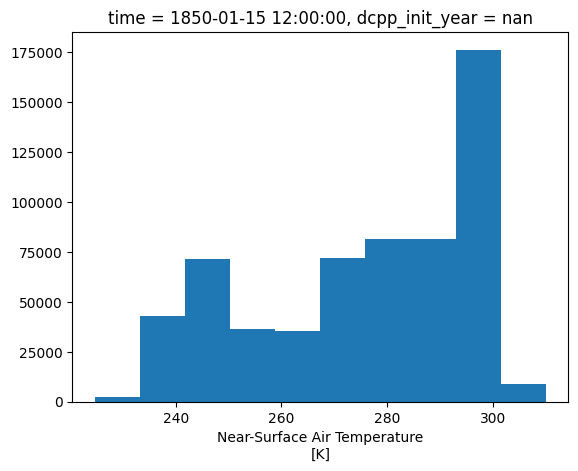

In [10]:
# Quick plot
ds['tas'].isel(time=0).plot()

# UKESM1-0-LL

In [68]:
query = dict(
    experiment_id=["ssp585"],
    source_id=["UKESM1-0-LL"],
    table_id = ['6hrLev'],
)

cat = col.search(**query)
cat

,unique
activity_id,1
institution_id,1
source_id,1
experiment_id,1
member_id,1
table_id,1
variable_id,5
grid_label,1
zstore,5
dcpp_init_year,0


In [69]:
# Load the dataset with anonymous access
dset_dict = cat.to_dataset_dict(zarr_kwargs={"consolidated": True},
                                storage_options={"token": "anon"})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [70]:
# Pick the dataset
ds = list(dset_dict.values())[0]

In [71]:
ds

<xarray.Dataset> Size: 37TB
Dimensions:         (lat: 289, lev: 170, lon: 384, time: 123840, member_id: 1,
                     dcpp_init_year: 1, bnds: 2)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.38 -88.75 ... 88.75 89.38 90.0
  * lev             (lev) float64 1kB 10.0 20.0 36.67 ... 8.205e+04 8.5e+04
  * lon             (lon) float64 3kB 0.0 0.9375 1.875 ... 357.2 358.1 359.1
  * time            (time) object 991kB 2015-01-01 06:00:00 ... 2101-01-01 00...
  * member_id       (member_id) object 8B 'r1i1p1f2'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    b               (lev) float64 1kB dask.array<chunksize=(85,), meta=np.ndarray>
    b_bnds          (lev, bnds) float64 3kB dask.array<chunksize=(85, 2), meta=np.ndarray>
    lat_bnds        (lat, bnds) float64 5kB dask.array<chunksize=(144, 2), meta=np.ndarray>
    lev_bnds        (lev, bnds) float64 3kB dask.array<chunksize=(85, 2), meta=np.ndarray>
    lon_bnds        (lon, bnds) float64 6kB dask.array<chunksize=(192, 2), meta=np.ndarray>
    orog            (lat, lon) float32 444kB dask.array<chunksize=(144, 192), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    va              (member_id, dcpp_init_year, time, lev, lat, lon) float32 9TB dask.array<chunksize=(1, 1, 38, 85, 145, 192), meta=np.ndarray>
    ua              (member_id, dcpp_init_year, time, lev, lat, lon) float32 9TB dask.array<chunksize=(1, 1, 38, 85, 144, 192), meta=np.ndarray>
    ta              (member_id, dcpp_init_year, time, lev, lat, lon) float32 9TB dask.array<chunksize=(1, 1, 44, 85, 144, 192), meta=np.ndarray>
    ps              (member_id, dcpp_init_year, time, lat, lon) float32 55GB dask.array<chunksize=(1, 1, 745, 144, 192), meta=np.ndarray>
    hus             (member_id, dcpp_init_year, time, lev, lat, lon) float32 9TB dask.array<chunksize=(1, 1, 7, 85, 144, 192), meta=np.ndarray>
Attributes: (12/52)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      ScenarioMIP
    branch_method:                    standard
    branch_time_in_child:             59400.0
    branch_time_in_parent:            59400.0
    cmor_version:                     3.4.0
    ...                               ...
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20200602
    intake_esm_attrs:_data_format_:   zarr
    external_variables:               areacella
    version_id:                       v20200602
    intake_esm_dataset_key:           ScenarioMIP.MOHC.UKESM1-0-LL.ssp585.6hr...